# Sentiment Analysis for Customer Reviews Challenge

## Challenge:
Develop a robust Sentiment Analysis classifier for XYZ customer reviews, automating the categorization into positive, negative, or neutral sentiments. Utilize Natural Language Processing (NLP) techniques, exploring different sentiment analysis methods.

## Problem Statement:
XYZ organization, a global online retail giant, accumulates a vast number of customer reviews daily. Extracting sentiments from these reviews offers insights into customer satisfaction, product quality, and market trends. The challenge is to create an effective sentiment analysis model that accurately classifies XYZ customer reviews.

### Important Instructions:

1. Make sure this ipynb file that you have cloned is in the __Project__ folder on the Desktop. The Dataset is also available in the same folder.
2. Ensure that all the cells in the notebook can be executed without any errors.
3. Once the Challenge has been completed, save the SentimentAnalysis.ipynb notebook in the __*Project*__ Folder on the desktop. If the file is not present in that folder, autoevalution will fail.
4. Print the evaluation metrics of the model. 
5. Before you submit the challenge for evaluation, please make sure you have assigned the Accuracy score of the model that was created for evaluation.
6. Assign the Accuracy score obtained for the model created in this challenge to the specified variable in the predefined function *submit_accuracy_score*. The solution is to be written between the comments `# code starts here` and `# code ends here`
7. Please do not make any changes to the variable names and the function name *submit_accuracy_score* as this will be used for automated evaluation of the challenge. Any modification in these names will result in unexpected behaviour.

### --------------------------------------- CHALLENGE CODE STARTS HERE --------------------------------------------

In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud



In [4]:
review_data = pd.read_csv('Reviews.csv')
display(review_data)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [5]:
review_data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
review_data["ProductId"].unique()
len(review_data["ProductId"].unique())


74258

<Axes: xlabel='Score', ylabel='count'>

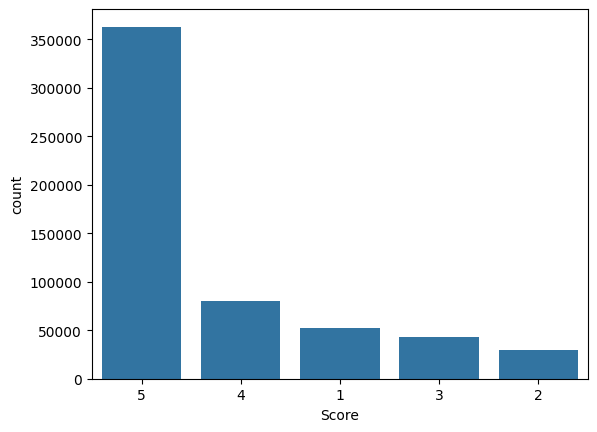

In [7]:
sns.countplot(data=review_data, 
              x='Score', 
              order=review_data.Score.value_counts().index)

In [8]:
review_data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [9]:
review_data.replace('',np.nan,inplace=True)
review_data.dropna(axis=0, how='any', inplace=True)


In [10]:
review_data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [11]:
# adding a sentiment column to classify reviews as Positive or Negative
# Positive = 1
# Negative = 0

review_data['sentiment'] = np.where(review_data['Score'] == 5.0, 1,
                           np.where(review_data['Score'] == 4.0, 1, 0))

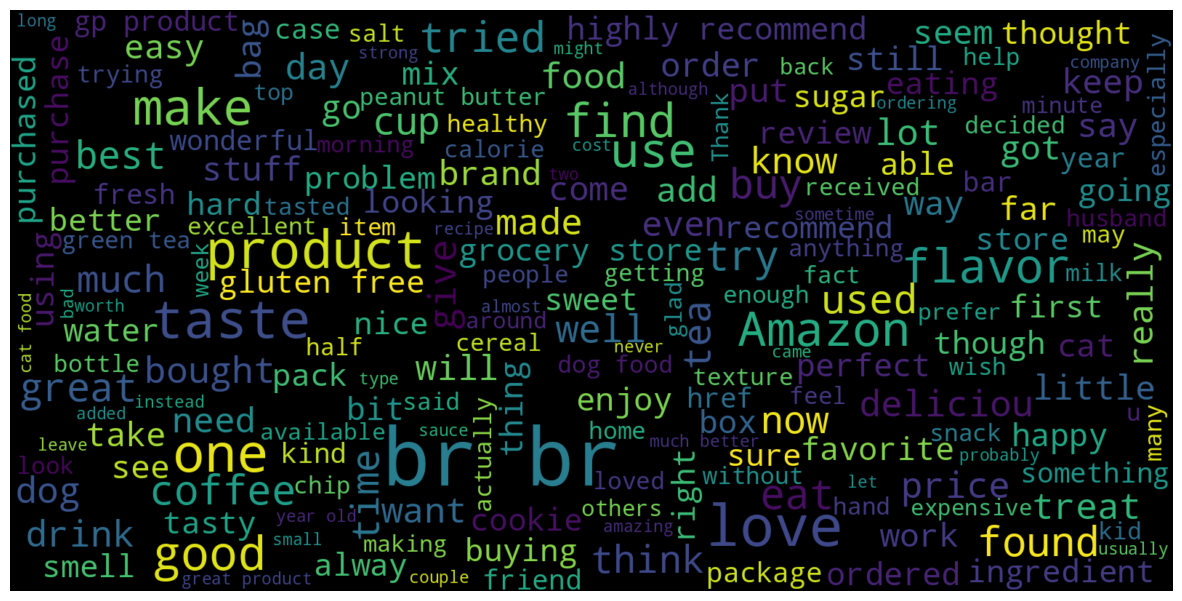

In [12]:
consolidated = ' '.join( 
    word for word in review_data['Text'][review_data['sentiment'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
                      random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

In [13]:
X = review_data['Text']
Y = review_data['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [24]:
!pip install lxml

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.0 MB/s eta 0:00:0000:0100:01


In [14]:
# function to remove html elements from the reviews text
def removeHTML(valuetext):
    clean_HTML = BeautifulSoup(valuetext, 'html.parser')#.get_text()
    for data in clean_HTML(['style', 'script']):
        # Remove tags
        data.decompose()
 
    # return data by retrieving the tag content
    return ' '.join(clean_HTML.stripped_strings)
    #return clean_HTML

In [15]:
# function to remove special characters and numbers from the review text
def removeSpecialChar(raw_text):
    clean_SpecialChar = re.sub("[^a-zA-Z]", " ", raw_text)  
    return clean_SpecialChar

In [16]:
# function to convert all reviews into lower case
def toLowerCase(raw_text):
    clean_LowerCase = raw_text.lower().split()
    return( " ".join(clean_LowerCase))  

In [17]:
# function to remove stop words from the reviews
nltk.download('stopwords')
def removeStopWords(raw_text):
    stops = set(stopwords.words("english"))
    words = [w for w in raw_text if not w in stops]
    return( " ".join(words))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/labuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
HTML_DOC = """
              <html>This is very good </html>
            """

In [51]:
print(removeHTML(HTML_DOC))

This is very good


In [20]:
# X_training clean set
X_train_cleaned = []

for val in X_train:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    removeStopWords(val) 
    X_train_cleaned.append(val) 

/tmp/ipykernel_2013/1190463340.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_HTML = BeautifulSoup(valuetext, 'html.parser')#.get_text()


In [21]:
# X_testing clean set
X_test_cleaned = []

for val in X_test:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    removeStopWords(val)
    X_test_cleaned.append(val) 

/tmp/ipykernel_2013/1190463340.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_HTML = BeautifulSoup(valuetext, 'html.parser')#.get_text()


In [22]:
# Convert a collection of raw documents to a matrix of TF-IDF features. This is required so as to train the model using features instead of 
tvec = TfidfVectorizer(use_idf=True,
strip_accents='ascii')

X_train_tvec = tvec.fit_transform(X_train_cleaned)


In [23]:
# Support Vector Classifier model
svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
svr_lin.fit(X_train_tvec, Y_train)

LinearSVC(dual=False)

In [30]:
!pip install jinja2

Defaulting to user installation because normal site-packages is not writeable


In [31]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
svr_lin_predictions = svr_lin.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,svr_lin_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)

display(data_report)

,precision,recall,f1-score,support
0,0.83,0.75,0.79,24912.00
1,0.93,0.96,0.94,88769.00
accuracy,0.91,0.91,0.91,0.91
macro avg,0.88,0.85,0.87,113681.00
weighted avg,0.91,0.91,0.91,113681.00


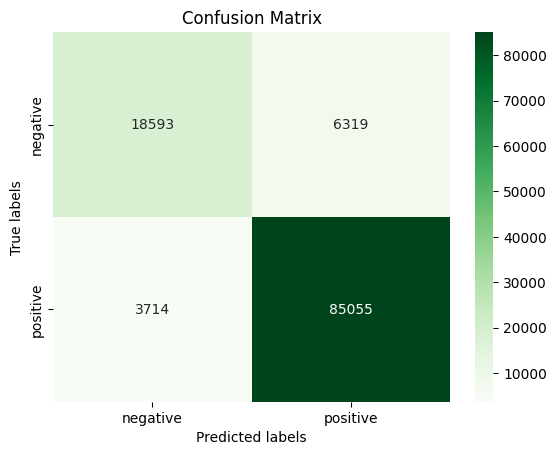

In [32]:
# confusion matrix
svr_lin_predictions=svr_lin.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,svr_lin_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Greens');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);

In [33]:
# testing the model with sample 'Negative' review
demo_review = np.array(['Product not very useful, supposed to not buy.'])
demo_review_X_test = tvec.transform(demo_review)
print(svr_lin.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)

[0]


In [34]:
# testing the model with sample 'Positive' review
demo_review = np.array(['Product is very good, suggest to buy.'])
demo_review_X_test = tvec.transform(demo_review)
print(svr_lin.predict(demo_review_X_test))

# expected output = 1 (Positive)
# actual output = 1 (Positive)

[1]


In [41]:
# Naive Bayes model
nbm = naive_bayes.MultinomialNB()
nbm.fit(X_train_tvec, Y_train)


MultinomialNB()

In [42]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 
nbm_predictions = nbm.predict(tvec.transform(X_test_cleaned))
report = classification_report(Y_test,nbm_predictions, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
display(data_report)

,precision,recall,f1-score,support
0,0.92,0.21,0.34,24912.00
1,0.82,1.00,0.90,88769.00
accuracy,0.82,0.82,0.82,0.82
macro avg,0.87,0.60,0.62,113681.00
weighted avg,0.84,0.82,0.78,113681.00


[Text(0, 0.5, 'negative'), Text(0, 1.5, 'positive')]

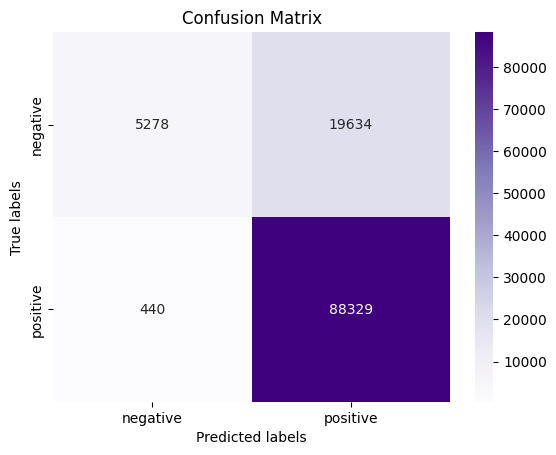

In [45]:
# confusion matrix
nbm_predictions=nbm.predict(tvec.transform(X_test_cleaned))
ax= plt.subplot()
cm=confusion_matrix(Y_test,nbm_predictions)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Purples');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive'])

### --------------------------------------- CHALLENGE CODE ENDS HERE --------------------------------------------

### NOTE:
1. Assign the Accuracy score obtained for the model created in this challenge to the specified variable in the predefined function *submit_accuracy_score* below. The solution is to be written between the comments `# code starts here` and `# code ends here`
2. Please do not make any changes to the variable names and the function name *submit_accuracy_score* as this will be used for automated evaluation of the challenge. Any modification in these names will result in unexpected behaviour.

In [47]:
def submit_accuracy_score()-> float:
    #accuracy should be in the range of 0.0 to 1.0
    accuracy = 0.0
    # code starts here
    pred = modl_type.predict(X_train_tvec) 
    accuracy=accuracy_score(Y_train,pred)
    # code ends here
    return accuracy

In [48]:
modl_type=svr_lin
submit_accuracy_score()

0.9308607494722027

In [49]:
modl_type=nbm
submit_accuracy_score()

0.828725369458128